In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/machinelearning-Lab4/Lab4/LogisticRegression/suv_data.csv'
suvDF = pd.read_csv(url)
dataFrame = suvDF.copy()
suvDF.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

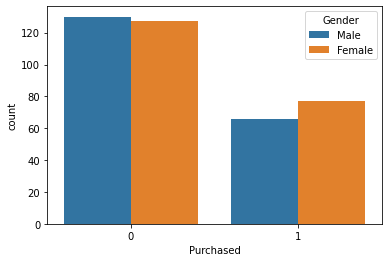

In [3]:
sns.countplot(x = 'Purchased', hue = 'Gender', data = suvDF)

In [4]:
suvDF.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

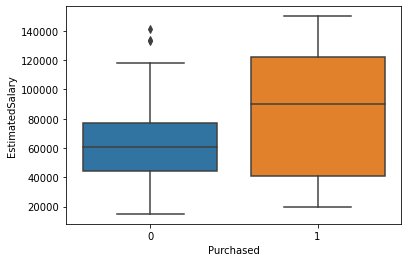

In [5]:
'''
les :
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
for å forstå boxplot bedre
'''
sns.boxplot(x = 'Purchased', y ='EstimatedSalary', data = suvDF)

In [6]:
sex = pd.get_dummies(suvDF['Gender'], drop_first = True)
sex.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [7]:
suvDF.drop('User ID', axis = 'columns', inplace = True)

In [8]:
suvDF.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
suvDF = pd.concat([suvDF,sex],axis = 'columns')

In [10]:
suvDF.drop('Gender', axis = 'columns', inplace = True)

In [11]:
suvDF.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [12]:
dataFrame.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Lage og trene en model

In [13]:
# Er ikke sikkert jeg trenger alle
# Kan hende jeg kan fjerne noen av disse 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metric
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import multilabel_confusion_matrix